# Observations:
1. The recorded temperatures increases as approaches near equator.
2. Cloudiness do not have direct relation to latitude position.
3. Most of the location have high humdity.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import openweathermapy as owm
from pprint import pprint

#import google maps
import gmaps

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
s_loc=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])#.city_name
    city_title=f'{city.city_name},{city.country_code}'
    # If the city is unique, then add it to a our cities list
    if city_title not in cities:
        cities.append(city_title)
        s_loc.append(lat_lng)
#        s_lng.append(lat_lng[1])
# Print the city count to confirm sufficient count
#vars(cities[0])
len(cities)

594

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
raw_data=[requests.get(f'{url}&q={city}').json() for city in cities]
#raw_data=[requests.get(f'{url}&lat={loc[0]}&lon={loc[1]}').json() for loc in s_loc]

#Using OpenWeather API Wrapper
#settings={'APPID': api_key,'units':'Imperial'}
#raw_data=[ow.get_current(city,**settings) for city in cities]
#raw_data=[owm.get_current((-5.6497700278019636, -117.06043219075768)) for lat_lng in lat_lngs]
#raw_data

In [4]:
len(raw_data)

594

In [5]:
#Perform data cleansing to identify and remove rows with invalid city information
cleansed_df=pd.DataFrame(raw_data)
cleansed_df=cleansed_df.dropna(subset=['name'])

print('List of Cities Included....')
print(len(cities))
cleansed_df['name']

List of Cities Included....
594


0                New Norfolk
1                     Torbay
2                      Vaini
3                   Khatanga
4                    Anahuac
5                     Yamada
7                  Carnarvon
8                  Hithadhoo
9               Puerto Ayora
10                 Cape Town
11                   Mingyue
12                   Ushuaia
14                    Kodiak
15            Severo-Kurilsk
16               Port Alfred
17            Saint-Philippe
18                  Lubartow
19                 Busselton
20                   Rikitea
22                     Altay
23           Bambous Virieux
24                    Hobart
25                   Peniche
26                     Talen
27                    Kaputa
28                     Kotka
29                   Bagrami
30                     Pasco
32                     Kapaa
33                 Ilulissat
               ...          
563                Egvekinot
564                    Tabas
565                   Nakusp
566           

In [6]:
#Collect list for weather parameters and latitude
temperature=[]
humidity=[]
wind_speed=[]
cloudiness=[]
latitude=[]
longitude=[]

for Index, city_data in cleansed_df.iterrows():
    #Print log of cities included in the set
    #print(f"City: {city_data['name']} City ID: {city_data['id']}")
    #if city_data.loc['cod']==200:
        temperature.append(city_data.loc['main']['temp'])
        humidity.append(city_data.loc['main']['humidity'])
        wind_speed.append(city_data.loc['wind']['speed'])
        cloudiness.append(city_data.loc['clouds']['all'])
        latitude.append(city_data.loc['coord']['lat'])
        longitude.append(city_data.loc['coord']['lon'])
        #print(f"City: {city_data.loc['name']} City ID: {city_data.loc['id']}")


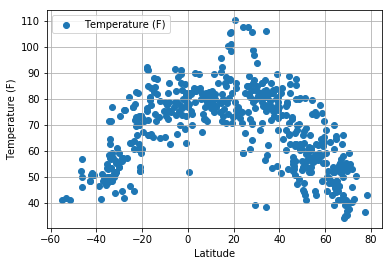

In [7]:
#Plot Scatter Plots #Temperature (F) vs. Latitude
plt.scatter(latitude,temperature,marker='o',linestyle='-',label='Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.legend()
plt.savefig('temperature vs latitude.png')
plt.show()


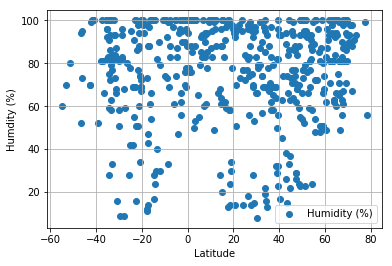

In [8]:
#Plot Scatter Plots Humidity (%) vs. Latitude
plt.scatter(latitude,humidity,marker='o',linestyle='-',label='Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humdity (%)')
plt.grid()
plt.legend()
plt.savefig('humidity vs latitude.png')
plt.show()

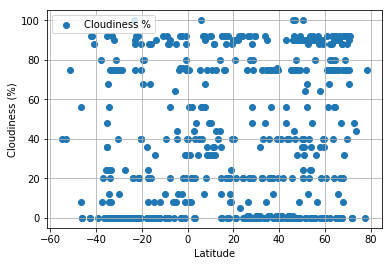

In [9]:
#Plot Scatter Plots #Cloudiness (%) vs. Latitude
plt.scatter(latitude,cloudiness,marker='o',linestyle='-',label='Cloudiness %')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.legend()
plt.savefig('cloudiness vs latitude.png')
plt.show()

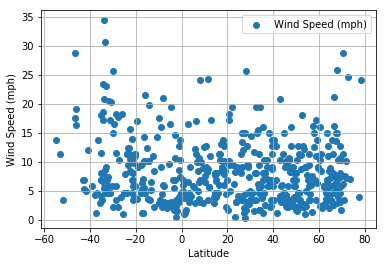

In [10]:
#Plot Scatter Plots #Wind Speed (mph) vs. Latitude
plt.scatter(latitude,wind_speed,marker='o',linestyle='-',label='Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.legend()
plt.savefig('Wind Speed vs latitude.png')
plt.show()

In [11]:
#Export the good retrieved data to csv
cleansed_df.to_csv('weather_data.csv',encoding='UTF-8')

In [12]:
np.median(humidity)

81.0